In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px

In [57]:
df = pd.read_csv("nchs_covid_reduced_access_to_health_care.csv")

In [161]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,"Delayed Medical Care, Last 4 Weeks",National Estimate,United States,United States,1,1,Apr 23 - May 5,04/23/2020,2020-05-05,38.7,38.1,39.4,38.1 - 39.4,NaN
1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,04/23/2020,2020-05-05,34.8,32.5,37.2,32.5 - 37.2,NaN
2,"Delayed Medical Care, Last 4 Weeks",By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,04/23/2020,2020-05-05,37.3,35.6,39.0,35.6 - 39.0,NaN
3,"Delayed Medical Care, Last 4 Weeks",By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,04/23/2020,2020-05-05,40.3,39.0,41.7,39.0 - 41.7,NaN
4,"Delayed Medical Care, Last 4 Weeks",By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,04/23/2020,2020-05-05,40.7,39.3,42.2,39.3 - 42.2,NaN


In [58]:
df["Indicator"].value_counts()

Delayed or Did Not Get Care, Last 4 Weeks    2379
Delayed Medical Care, Last 4 Weeks           2379
Did Not Get Needed Care, Last 4 Weeks        2360
Name: Indicator, dtype: int64

In [158]:
df["Group"].value_counts()

By State                      5049
By Age                         749
By Race/Hispanic ethnicity     535
By Education                   428
By Sex                         214
National Estimate              107
By Disability status            36
Name: Group, dtype: int64

In [59]:
df["Time Period End Date"] = df["Time Period End Date"].apply(pd.to_datetime)

In [60]:
df_nat = df.query("Group == 'National Estimate'")

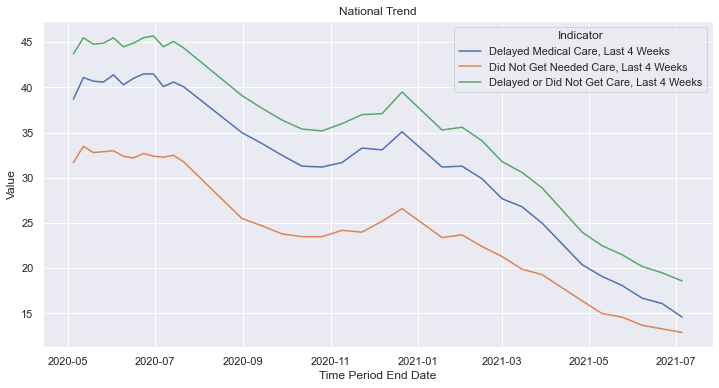

In [148]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_nat, x="Time Period End Date", y="Value", hue="Indicator")
plt.title("National Trend");

In [77]:
df_state = df.query("Group == 'By State'")
df_big_states = df_state[df_state["State"].isin(["California", "Texas", "New York", "Florida"])]

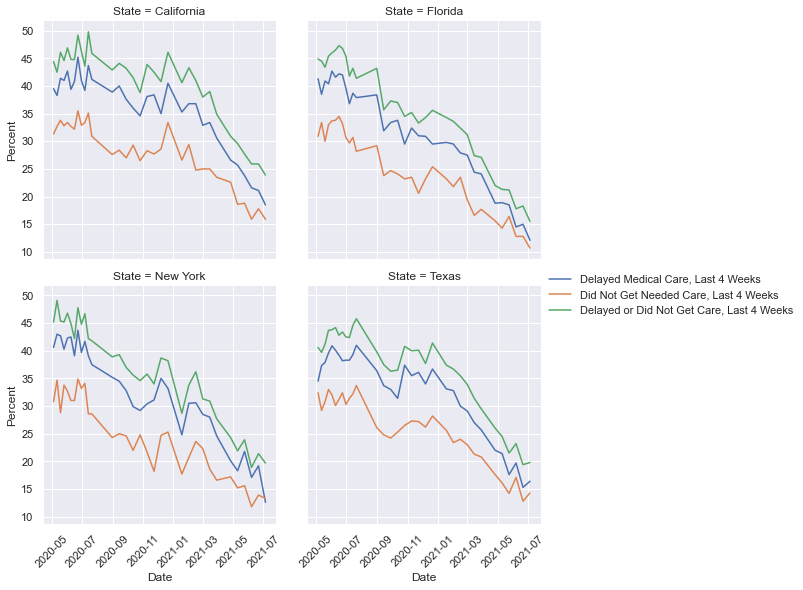

In [157]:
g = sns.FacetGrid(df_big_states, col="State", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, "Time Period End Date", "Value", "Indicator")
g.set_axis_labels("Date", "Percent")
g.add_legend()
g.set_xticklabels(rotation = 45);

In [160]:
df_race = df.query("Group == 'By Race/Hispanic ethnicity'")

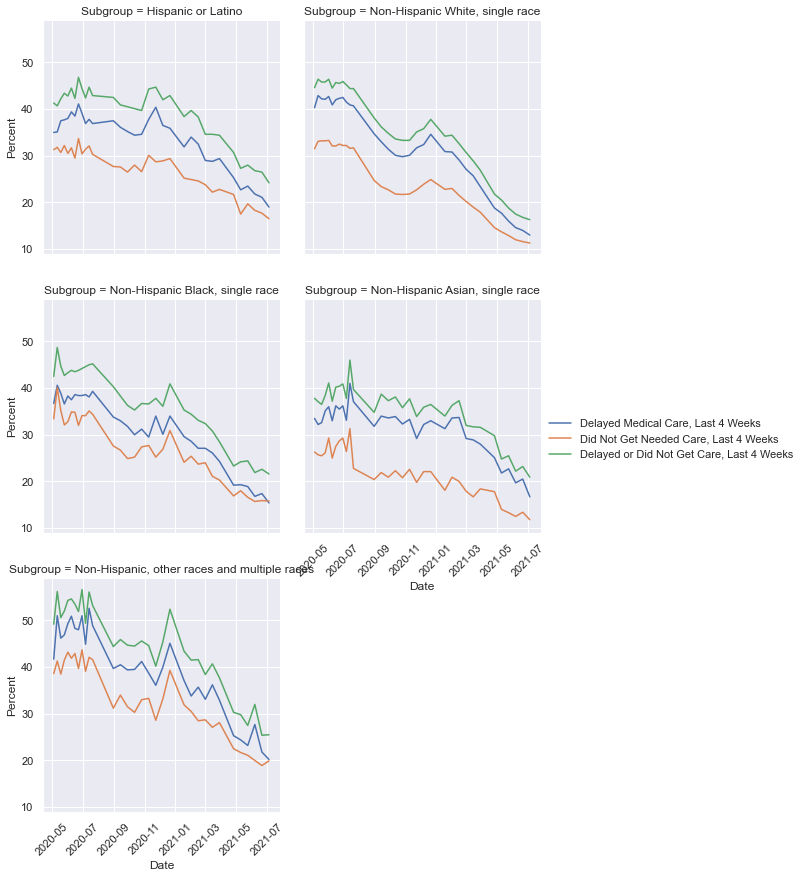

In [207]:
g = sns.FacetGrid(df_race, col="Subgroup", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, "Time Period End Date", "Value", "Indicator")
g.set_axis_labels("Date", "Percent")
g.add_legend()
g.set_xticklabels(rotation = 45);

In [170]:
df_affected = df[df["Indicator"] == "Delayed or Did Not Get Care, Last 4 Weeks"]

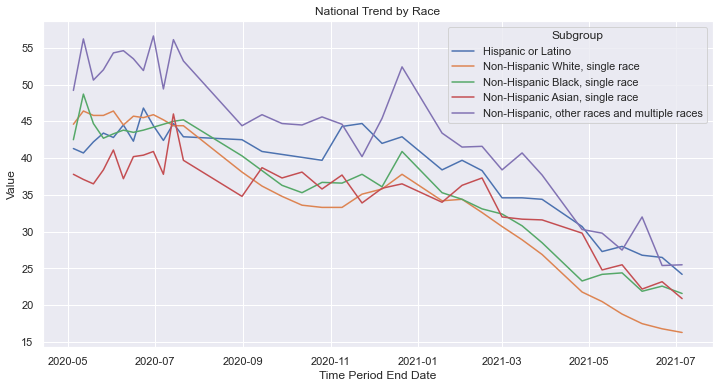

In [182]:
by_race = df_affected.query("Group == 'By Race/Hispanic ethnicity' & State == 'United States'")
plt.figure(figsize=(12, 6))
sns.lineplot(data=by_race,
             x="Time Period End Date", y="Value", hue="Subgroup")
plt.title("National Trend by Race");

In [200]:
by_race

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
150,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,Apr 23 - May 5,04/23/2020,2020-05-05,41.3,39.0,43.6,39.0 - 43.6,NaN
151,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic White, single race",1,1,Apr 23 - May 5,04/23/2020,2020-05-05,44.6,44.0,45.3,44.0 - 45.3,NaN
152,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",1,1,Apr 23 - May 5,04/23/2020,2020-05-05,42.5,40.3,44.8,40.3 - 44.8,NaN
153,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,1,Apr 23 - May 5,04/23/2020,2020-05-05,37.8,34.5,41.2,34.5 - 41.2,NaN
154,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,1,Apr 23 - May 5,04/23/2020,2020-05-05,49.2,45.6,52.8,45.6 - 52.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,Hispanic or Latino,3.1,33,Jun 23 - Jul 5,06/23/2021,2021-07-05,24.2,21.4,27.1,21.4 - 27.1,NaN
7057,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic White, single race",3.1,33,Jun 23 - Jul 5,06/23/2021,2021-07-05,16.3,15.6,17.0,15.6 - 17.0,NaN
7058,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",3.1,33,Jun 23 - Jul 5,06/23/2021,2021-07-05,21.6,19.5,23.9,19.5 - 23.9,NaN
7059,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",3.1,33,Jun 23 - Jul 5,06/23/2021,2021-07-05,20.9,17.3,24.8,17.3 - 24.8,NaN


In [205]:
# show state names on hover
fig = px.line(by_race, x="Time Period End Date", y="Value", color="Subgroup"); 

fig.show(); 